# Final Project: Breath Alcohol Tests in a College Town
**Completed By Team 5:** 
***

Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.

The data file `'breath_alcohol_ames.csv'` contains 1,556 readings from breath alcohol tests administered by the Ames and Iowa State University Police Departments from January 2013 to December 2017. The columns in this data set are `year`, `month`, `day`, `hour`, `location`, `gender`, `Res1`, `Res2`.

***

### Part 1.

- Import pandas aliased as `pd`
- Read `breath_alcohol_ames.csv` into your workspace using the `read_csv()` function. Save it as `ba_data`
- Look at the format of your dataset using the `head()` function
- Count how many tests were administered in each year using the `value_counts()` function. Assign the results to `ba_year`

In [1]:
# Import essential packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('notebook')

#### Data Collection

##### Load Data from CSV File

In [2]:
# Read the data into your workspace
path = 'TEAM5breath_alcohol_ames.csv'
ba_data = pd.read_csv(path)

#### Data Definition 
##### Explore the Data

In [3]:
# Quickly inspect the data
ba_data.head()

,year,month,day,hour,location,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


In [4]:
ba_data.tail(3)

,year,month,day,hour,location,gender,Res1,Res2
1553,2013,1,1,3,Ames PD,M,0.090,0.090
1554,2013,1,1,2,ISU PD,F,0.132,0.131
1555,2013,1,1,0,ISU PD,M,0.130,0.130


In [5]:
# Dimensions of the dataset. #(samples,features)
print("There are", ba_data.shape[0], "Rows(Observations).")
print("There are", ba_data.shape[1], "Columns(Features).")
ba_data.shape

There are 1556 Rows(Observations).
There are 8 Columns(Features).


(1556, 8)

In [6]:
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1556 non-null   int64  
 1   month     1556 non-null   int64  
 2   day       1556 non-null   int64  
 3   hour      1556 non-null   int64  
 4   location  1556 non-null   object 
 5   gender    1527 non-null   object 
 6   Res1      1556 non-null   float64
 7   Res2      1556 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 97.4+ KB


We see from df.info() that the 'gender' column has missing values.

In [7]:
ba_data.describe()

,year,month,day,hour,Res1,Res2
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000
mean,2014.775707,6.258355,15.872108,5.122751,0.117526,0.117085
std,1.426150,3.363903,8.676373,6.460941,0.067389,0.067183
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,8.000000,2.000000,0.078000,0.078750
50%,2015.000000,6.000000,16.000000,3.000000,0.123000,0.123000
75%,2016.000000,9.000000,24.000000,4.000000,0.163250,0.163000
max,2017.000000,12.000000,31.000000,23.000000,0.352000,0.351000


In [8]:
ba_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1556.0,2014.775707,1.426150,2013.0,2013.00000,2015.000,2016.00000,2017.000
month,1556.0,6.258355,3.363903,1.0,3.00000,6.000,9.00000,12.000
day,1556.0,15.872108,8.676373,1.0,8.00000,16.000,24.00000,31.000
hour,1556.0,5.122751,6.460941,0.0,2.00000,3.000,4.00000,23.000
Res1,1556.0,0.117526,0.067389,0.0,0.07800,0.123,0.16325,0.352
Res2,1556.0,0.117085,0.067183,0.0,0.07875,0.123,0.16300,0.351


In [9]:
# Inspect the ranges of each column.
range_min_max = ba_data.aggregate([min, max]).T
range_min_max

,min,max
year,2013,2017
month,1,12
day,1,31
hour,0,23
location,Ames PD,ISU PD
Res1,0,0.352
Res2,0,0.351


#### Count how many tests were administered in each year using the value_counts() function.

In [10]:
# Obtain counts for each year 
pd.DataFrame(ba_data['year'].value_counts())

,year
2013,397
2014,344
2015,286
2016,269
2017,260


<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">How many tests were administered in each year?</h4>
    <hr>
    <p>
- The highest number of tests administered were 397 tests in 2013.<br>
- The lowest number of tests administered were 260 tests in 2017.
    </p>
</div>

*** 
## Data Wrangling
### Part 2.

There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyzer tests?


- Group and summarize the data by location with the `value_counts` function. Save this data as `pds`.

#### Rename Columns

In [11]:
ba_data = ba_data.rename(
    columns = {
    'location':'departments',
})
ba_data

,year,month,day,hour,departments,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084
...,...,...,...,...,...,...,...,...
1551,2013,1,5,23,Ames PD,M,0.182,0.181
1552,2013,1,4,2,ISU PD,M,0.066,0.065
1553,2013,1,1,3,Ames PD,M,0.090,0.090
1554,2013,1,1,2,ISU PD,F,0.132,0.131


The column names have mixture of upper and lower cases. We'll convert them all to lower cases.

In [12]:
# Convert all column header to lower case
ba_data.columns = [x.lower() for x in ba_data.columns]
ba_data.head()

,year,month,day,hour,departments,gender,res1,res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


Since ISU PD is all uppercase. We'll be consistent by making Ames PD uppercase as well. 

In [13]:
ba_data['departments'] = ba_data['departments'].apply(lambda x: x.upper())

In [14]:
ba_data.head()

,year,month,day,hour,departments,gender,res1,res2
0,2017,12,17,1,AMES PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


#### Use value_counts to tally up the totals for each department

In [15]:
pds = ba_data['departments'].value_counts()
pd.DataFrame(pds)

,departments
ISU PD,940
AMES PD,616


<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">Which department administers more breathalyzer tests?</h4>
    <hr>
    <p>
- ISU PD is the department which administered the most breathalyzer tests.
    </p>
</div>

*** 
## Exploratory Data Analysis
### Part 3.

We all know that "nothing good happens after 2am." Thus, there are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyzer tests?

- Using `groupby()` and `size()`, summarize the data by hour. Save this as `hourly`
- Create a bar chart of total breath alcohol tests by hour of the day using `plot.bar` on the hourly Series

In [16]:
# Count by hour 
hourly = ba_data.groupby(['hour']).size()
hourly.head()

hour
0     98
1    219
2    417
3    364
4    124
dtype: int64

Text(0, 0.5, 'Count')

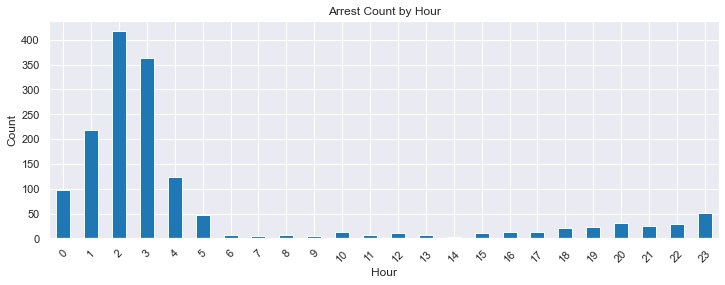

In [17]:
# Create a vertical bar graph of the arrest count by hour
hourly.plot(
    x='hour', 
    kind='bar',
    figsize=(12,4),
    rot=45
)

plt.title("Arrest Count by Hour")
plt.xlabel('Hour')
plt.ylabel('Count')

In [18]:
hourly = ba_data.groupby(['hour']).size().sort_values(ascending=False)
pd.DataFrame(hourly.head())

,0
hour,
2,417
3,364
1,219
4,124
0,98


<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">Which hours of the day have the most and least breathalyzer tests?</h4>
    <hr>
    <p>
- 2 am is the most common time of day for breathalyzer tests to be administered.<br>
- 2 pm is the least common time of day for breathalyzer tests to be administered.
    </p>
</div>

*** 

### Part 4.

Now that we have discovered which time of day is most common for breath alcohol tests, we will determine which time of the year has the most breathalyzer tests. Which month will have the most recorded tests?



- Using `groupby()` and `size()`, summarize the data by month. Save this as `monthly`
- Create a bar chart of total breath alcohol tests by month using `plot.bar` on the monthly Series

In [19]:
# Convert month integer to month name. Ex 12 will be December
ba_data['month_name'] = pd.to_datetime(ba_data.month, format='%m').dt.month_name()
ba_data

,year,month,day,hour,departments,gender,res1,res2,month_name
0,2017,12,17,1,AMES PD,M,0.046,0.046,December
1,2017,12,14,3,ISU PD,F,0.121,0.120,December
2,2017,12,10,5,ISU PD,F,0.068,0.067,December
3,2017,12,10,3,ISU PD,F,0.077,0.077,December
4,2017,12,9,2,ISU PD,M,0.085,0.084,December
...,...,...,...,...,...,...,...,...,...
1551,2013,1,5,23,AMES PD,M,0.182,0.181,January
1552,2013,1,4,2,ISU PD,M,0.066,0.065,January
1553,2013,1,1,3,AMES PD,M,0.090,0.090,January
1554,2013,1,1,2,ISU PD,F,0.132,0.131,January


In [20]:
# Count by month and arrange by descending frequency
monthly = ba_data.groupby(['month']).size()
monthly.head()

month
1    145
2    117
3    145
4    159
5    132
dtype: int64

Text(0, 0.5, 'Count')

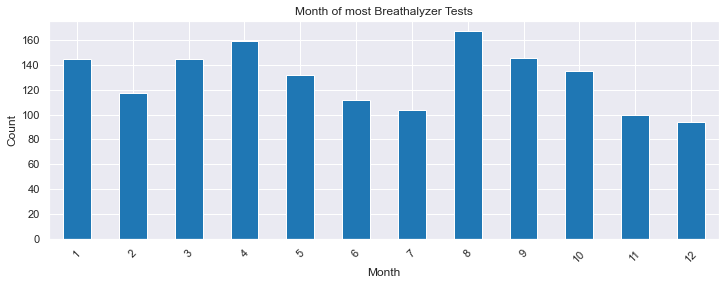

In [21]:
# Use plot.bar to make the appropriate bar chart
monthly.plot(
    x='month', 
    kind='bar',
    figsize=(12,4),
    rot=45
    
)

plt.title("Month of most Breathalyzer Tests")
plt.xlabel('Month')
plt.ylabel('Count')

<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">Which month will have the most recorded tests?</h4>
    <hr>
    <p>
 - August - Month (8) - is the time of the year that has the most breathalyzer tests.
    </p>
</div>

***

# Part 5.

When we think of (binge) drinking in college towns in America, we usually think of the movie *Animal House*. And so, one might suspect that breath alcohol tests are given to men more often than women and that men drink more than women.


- Count the number of tests by gender using `value_counts()` to see which gender took more tests
- Remove the NA values in the gender variable with `dropna()` and save the results as `gen`
- In `gen`, use the `assign()` method to create a new variable called `meanRes`, the mean of the two tests `Res1` and `Res2`. Assign the resulting DataFrame to `mean_bas`. **Note:** To create the mean of the two columns, add the columns and divide by 2 (the number of columns) inside the `assign` method.
- Using `mean_bas`, create boxplots of mean results for men and women. Use `meanRes` on the y-axis and `gender` on the x-axis

In [22]:
# Count by gender
counts_gender = ba_data['gender'].value_counts()
pd.DataFrame(counts_gender)

,gender
M,1102
F,425


In [23]:
pd.DataFrame(ba_data['gender'].value_counts(normalize=True))

,gender
M,0.721676
F,0.278324


Males took more tests than females. 
- Males 72% and Female 27.8%

In [24]:
show_NaN = ba_data.isnull().any(axis=1)
ba_data[show_NaN]

,year,month,day,hour,departments,gender,res1,res2,month_name
43,2017,10,20,5,ISU PD,NaN,0.053,0.053,October
59,2017,10,7,1,AMES PD,NaN,0.199,0.198,October
157,2017,4,23,2,ISU PD,NaN,0.204,0.203,April
171,2017,4,12,11,AMES PD,NaN,0.000,0.000,April
172,2017,4,12,9,ISU PD,NaN,0.000,0.000,April
244,2017,1,17,3,AMES PD,NaN,0.127,0.126,January
279,2016,11,16,3,AMES PD,NaN,0.160,0.159,November
280,2016,11,14,1,AMES PD,NaN,0.170,0.170,November
363,2016,8,13,3,ISU PD,NaN,0.086,0.085,August
396,2016,6,29,16,AMES PD,NaN,0.000,0.000,June


In [25]:
# Create a dataset with no NAs in gender 
gen = ba_data.dropna(subset=['gender'], how='all')
gen

,year,month,day,hour,departments,gender,res1,res2,month_name
0,2017,12,17,1,AMES PD,M,0.046,0.046,December
1,2017,12,14,3,ISU PD,F,0.121,0.120,December
2,2017,12,10,5,ISU PD,F,0.068,0.067,December
3,2017,12,10,3,ISU PD,F,0.077,0.077,December
4,2017,12,9,2,ISU PD,M,0.085,0.084,December
...,...,...,...,...,...,...,...,...,...
1551,2013,1,5,23,AMES PD,M,0.182,0.181,January
1552,2013,1,4,2,ISU PD,M,0.066,0.065,January
1553,2013,1,1,3,AMES PD,M,0.090,0.090,January
1554,2013,1,1,2,ISU PD,F,0.132,0.131,January


In [26]:
# Create a dataset with no NAs in gender 
gen = ba_data.dropna(subset=['gender'])

In [27]:
# Create a mean test result variable
mean_bas = gen.assign(meanRes=(gen['res1'] + gen['res2'])/2)
mean_bas

,year,month,day,hour,departments,gender,res1,res2,month_name,meanRes
0,2017,12,17,1,AMES PD,M,0.046,0.046,December,0.0460
1,2017,12,14,3,ISU PD,F,0.121,0.120,December,0.1205
2,2017,12,10,5,ISU PD,F,0.068,0.067,December,0.0675
3,2017,12,10,3,ISU PD,F,0.077,0.077,December,0.0770
4,2017,12,9,2,ISU PD,M,0.085,0.084,December,0.0845
...,...,...,...,...,...,...,...,...,...,...
1551,2013,1,5,23,AMES PD,M,0.182,0.181,January,0.1815
1552,2013,1,4,2,ISU PD,M,0.066,0.065,January,0.0655
1553,2013,1,1,3,AMES PD,M,0.090,0.090,January,0.0900
1554,2013,1,1,2,ISU PD,F,0.132,0.131,January,0.1315


Text(0, 0.5, 'Mean Blood Alcohol Levels')

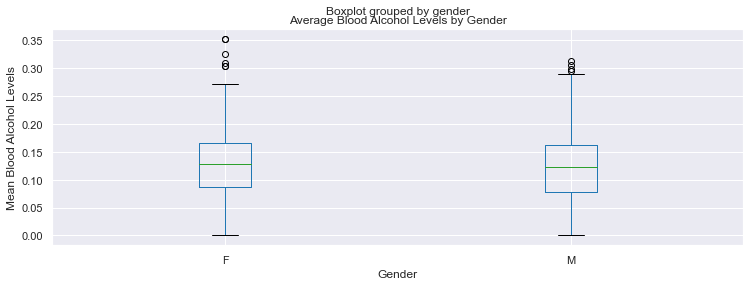

In [28]:
# Create side-by-side boxplots to compare the mean blood alcohol levels of men and women
mean_bas.boxplot(
    ['meanRes'], 
    by = 'gender',
    figsize=(12,4)
    
)
plt.title("Average Blood Alcohol Levels by Gender")
plt.xlabel('Gender')
plt.ylabel('Mean Blood Alcohol Levels')



<div class="alert alert-success" role="alert">
    <p>
The median is same for both females and males. While males took more tests, their were more outliers for females who had higher number of Breath Alcohol test level. 
    </p>
</div>

***

### Part 6.

In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for all 50 states. Assuming everyone tested in our data was driving (though we have no way of knowing this from the data), if either of the results (Res1, Res2) are above 0.08, the person would be charged with DUI (driving under the influence).


- Filter the `ba_data` to include only tests where one or both of `Res1`, `Res2` are greater than 0.08. Call this filtered data `duis`
- Create a variable, `p_dui`, for the proportion of all tests that would have resulted in a DUI and print the proportion
- **Note:** To calculate `p_dui`, use the `shape()` attribute of the `duis` and `ba_data` DataFrames to obtain the number of rows of each

In [29]:
# Filter the data
duis = ba_data[(ba_data['res1'] > 0.08) | (ba_data['res2'] > 0.08)]
duis 

,year,month,day,hour,departments,gender,res1,res2,month_name
1,2017,12,14,3,ISU PD,F,0.121,0.120,December
4,2017,12,9,2,ISU PD,M,0.085,0.084,December
5,2017,12,9,1,AMES PD,M,0.160,0.161,December
6,2017,12,7,3,AMES PD,M,0.131,0.131,December
8,2017,12,3,1,AMES PD,M,0.091,0.090,December
...,...,...,...,...,...,...,...,...,...
1550,2013,1,6,1,ISU PD,F,0.085,0.085,January
1551,2013,1,5,23,AMES PD,M,0.182,0.181,January
1553,2013,1,1,3,AMES PD,M,0.090,0.090,January
1554,2013,1,1,2,ISU PD,F,0.132,0.131,January


In [30]:
duisshape = duis.shape    
ba_datashape = ba_data.shape
print("duis Shape: \t", duisshape)
print("ba_data Shape:\t",ba_datashape)

duis Shape: 	 (1159, 9)
ba_data Shape:	 (1556, 9)


In [31]:
# Proportion of tests that would have resulted in a DUI
p_dui = duisshape[0] / ba_datashape[0]
#print(f"Proportion of tests that would have resulted in a DUI:\n {p_dui:.2%}")
print("The Proportion of tests that would have resulted in a DUI: {:.2%}".format(p_dui))

The Proportion of tests that would have resulted in a DUI: 74.49%


***

### Part 7.

We previously saw that 2am is the most common time of day for breathalyzer tests to be administered, and August is the most common month of the year for breathalyzer tests. Now, we look at the weeks in the year over time.

- Create a new column in `ba_data` called `date` by using `to_datetime()` to combine the date variables in the order of year, month, day
- Using the new `date` variable, create another new column in `ba_data` called `week` using `dt.week`

In [32]:
# Create date variable
date = ba_data[['year', 'month', 'day']]
ba_data['date'] = pd.to_datetime(date)

In [33]:
ba_data['week'] = ba_data['date'].dt.week

In [34]:
#Create Week Day name
ba_data['week_name'] = ba_data['date'].dt.day_name()

In [35]:
ba_data.head()

,year,month,day,hour,departments,gender,res1,res2,month_name,date,week,week_name
0,2017,12,17,1,AMES PD,M,0.046,0.046,December,2017-12-17,50,Sunday
1,2017,12,14,3,ISU PD,F,0.121,0.120,December,2017-12-14,50,Thursday
2,2017,12,10,5,ISU PD,F,0.068,0.067,December,2017-12-10,49,Sunday
3,2017,12,10,3,ISU PD,F,0.077,0.077,December,2017-12-10,49,Sunday
4,2017,12,9,2,ISU PD,M,0.085,0.084,December,2017-12-09,49,Saturday


***

### Part 8.

How do the weeks differ over time? One of the most common data visualizations is the time series, a line tracking the changes in a variable over time. We will use the new week variable to look at test frequency over time. We end with a time series plot showing the frequency of breathalyzer tests by week in year, with one line for each year.


- Group `ba_data` by the `week` and `year` columns and `count()` the number arrests per week in each year. Assign the result to `timeline`
- Turn index values of `timeline` into column names using `unstack()`, then create a line plot using `plot()`. `week` should be the x-axis and the count variable on the y-axis, colored by `year`. Title the graph `'VEISHEA DUIS'` and include a legend.

In [36]:
# Choose and count the variables of interest  
timeline = ba_data.groupby(['week','year']).count()['res1']
timeline

week  year
1     2013    6
      2014    5
      2015    5
      2016    6
      2017    5
             ..
52    2014    5
      2015    3
      2016    2
53    2015    4
      2016    1
Name: res1, Length: 259, dtype: int64

In [37]:
# Unstack
timeline = timeline.unstack()
timeline.head()

year,2013,2014,2015,2016,2017
week,,,,,
1,6.0,5.0,5.0,6.0,5.0
2,12.0,3.0,8.0,7.0,9.0
3,8.0,4.0,5.0,4.0,7.0
4,6.0,12.0,9.0,2.0,10.0
5,5.0,9.0,5.0,4.0,2.0


Text(0, 0.5, 'Count')

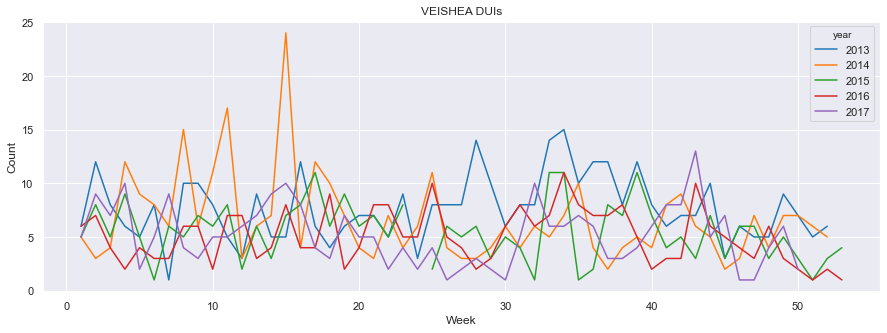

In [38]:
#Plot
timeline.plot(
    legend=True,
    figsize=(15,5)
)

plt.title('VEISHEA DUIs', loc='center')
plt.xlabel('Week')
plt.ylabel('Count')

<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">How do the weeks differ over time?</h4>
    <hr>
    <p>
    - According to the graph, in 2014 there was a large spike in week 14 that was correlated with the riot that occured in the early morning of April 9.<br>
    - Each year shows a spike in DUIs between weeks 30 and 40, possibly correlating with the fall's return to classes.</p>
</div>

***

## Export Data

In [42]:
#To CSV
ba_data.to_csv('Team5_Final.csv', index=False)

***

From Wikipedia: "VEISHEA was an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa. The celebration featured an annual parade and many open-house demonstrations of the university facilities and departments. Campus organizations exhibited products, technologies, and held fundraisers for various charity groups. In addition, VEISHEA brought speakers, lecturers, and entertainers to Iowa State. [...] VEISHEA was the largest student-run festival in the nation, bringing in tens of thousands of visitors to the campus each year."

This over 90-year tradition in Ames was terminated permanently after riots in 2014, where drunk celebrators flipped over multiple vehicles and tore light poles down. This was not the first incidence of violence and severe property damage in VEISHEA's history. Judging from the plot you created above, did former President Leath make the right decision by canceling VEISHEA?

<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">Judging from the plot you created above, did former President Leath make the right decision by canceling VEISHEA?</h4>
    <hr>
    <p>
    - Yes, she made the right decision. Prior to the cancelation there were huge spikes in arrest in 2014 leading up to the festival. These go back to 2013 but the spikes are much larger in 2014.<br>
    - After the riots, the spikes follow a more seasonal trend, start of the school year (observe the spikes near the start of the school year), around Week 1 (New Year Day), Week 12 (St. Patricks Day) and Week 44 (Halloween) are the largest spikes now.  All the years that follow, share a similar trend based on where the lows and highs of Dui Arrests appear on the graph. Those spikes pale in comparison to those that were present in 2014.</p>

</div>